In [1]:
import ROOT , time , sys , math , datetime
from matplotlib import pyplot as plt
import matplotlib , pandas as pd , numpy as np
%matplotlib inline
from ROOT import TPlots, TAnalysisEG2 , TEG2dm , TSchemeDATA ,GenerateEvents

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!


In [6]:
def plot_errorbar_and_fit( ax , x , y , xerr , yerr , color , marker , lstyle , label , fit_type='const',offset=0.3):
    plt.errorbar(x, y, xerr=xerr, yerr=yerr, color=color, marker=marker , linestyle=lstyle , label=None)
    if fit_type=='const':
        p1,v1 = np.polyfit( x , y , 0 , cov=True)
        ax.plot(x, np.ones(len(x))*p1[0] , color=color , label=label + "$=%.3f\pm%.3f$"%(p1[0],math.sqrt(v1[0][0])))
        # return a 2D variable - the const. fit + its error
        return [p1[0],math.sqrt(v1[0][0])] 
    elif fit_type=='linear':
        p2,v2 = np.polyfit( x , y , 1, cov=True)
        ax.plot(x, p2[0] * (x-offset) + p2[0]*offset + p2[1], color=color , 
                label=label + "$=%.2f(p_{miss}-%.1f)+(%.2f)$"%(p2[0],offset,p2[0]*offset + p2[1]))
        # return a set of 2D variables - the fit parameters + their errors
        return [p2[0],math.sqrt(v2[0][0])] , [p2[0]*offset + p2[1],math.sqrt(v2[0][0]*offset+v2[1][1])] 

In [8]:
# calculate the  C.M. parameters
# ToDo: add cross-section weighting to the fits
def calc_cm_parameters( fana  , outFileName ):
    outfile = open( outFileName , "wb")
    outfile.write('\n\n')
    outfile.write("pMiss_min,pMiss_max,mean_x,mean_xErr,sigma_x,sigma_xErr,mean_y,mean_yErr,sigma_y,sigma_yErr,mean_z,mean_zErr,sigma_z,sigma_zErr\n")
    for i in range(len(PmissBins)):
        x = fana.RooFitCM(PmissBins[i][0],PmissBins[i][1]) # RooFitCM return a parameter vector
        outfile.write("%.2f,%.2f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f\n" % ( PmissBins[i][0],PmissBins[i][1] ,x(0,0) ,x(0,1) ,x(1,0) ,x(1,1) , x(2,0) ,x(2,1) ,x(3,0), x(3,1) , x(4,0), x(4,1) , x(5,0), x(5,1)))
    outfile.write('\n\n')
    outfile.close()
    print "from \n/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_"+outFileName+".root"
    print "done calculating parameters, output can be found in the file:\n", outfile.name

In [9]:
PmissBins   = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
A = 12
dm = TEG2dm()

In [ ]:
# data
# ToDo: add proton fiducial cuts!
DataName    = "DATA_%s_ppSRC"% dm.Target(A)
SchemedName = "ppSRCCut_%s"% DataName
ana = TAnalysisEG2( SchemedName )
path = "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm"
CMParsFname = path+"/CMparameters_data.csv"
CMFitsFname = path+"/CMparameter_data_Fits.csv"
CMBandFname = path+"/CMparameter_data_Bands.csv"

In [6]:
calc_cm_parameters( ana  , CMParsFname )

from 
/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_C12_ppSRC.root
done calculating parameters, output can be found in the file:
/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/CMparameters.csv


In [7]:
# plot the C.M. parameters
data = pd.read_csv(CMParsFname)
Pmiss = (data.pMiss_max + data.pMiss_min)/2.
pMissUpErr , pMissLowErr = data.pMiss_max - Pmiss , Pmiss - data.pMiss_min
sigma_x = data.sigma_x

wrote fit parameters to
/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/CMparameter_Fits.csv


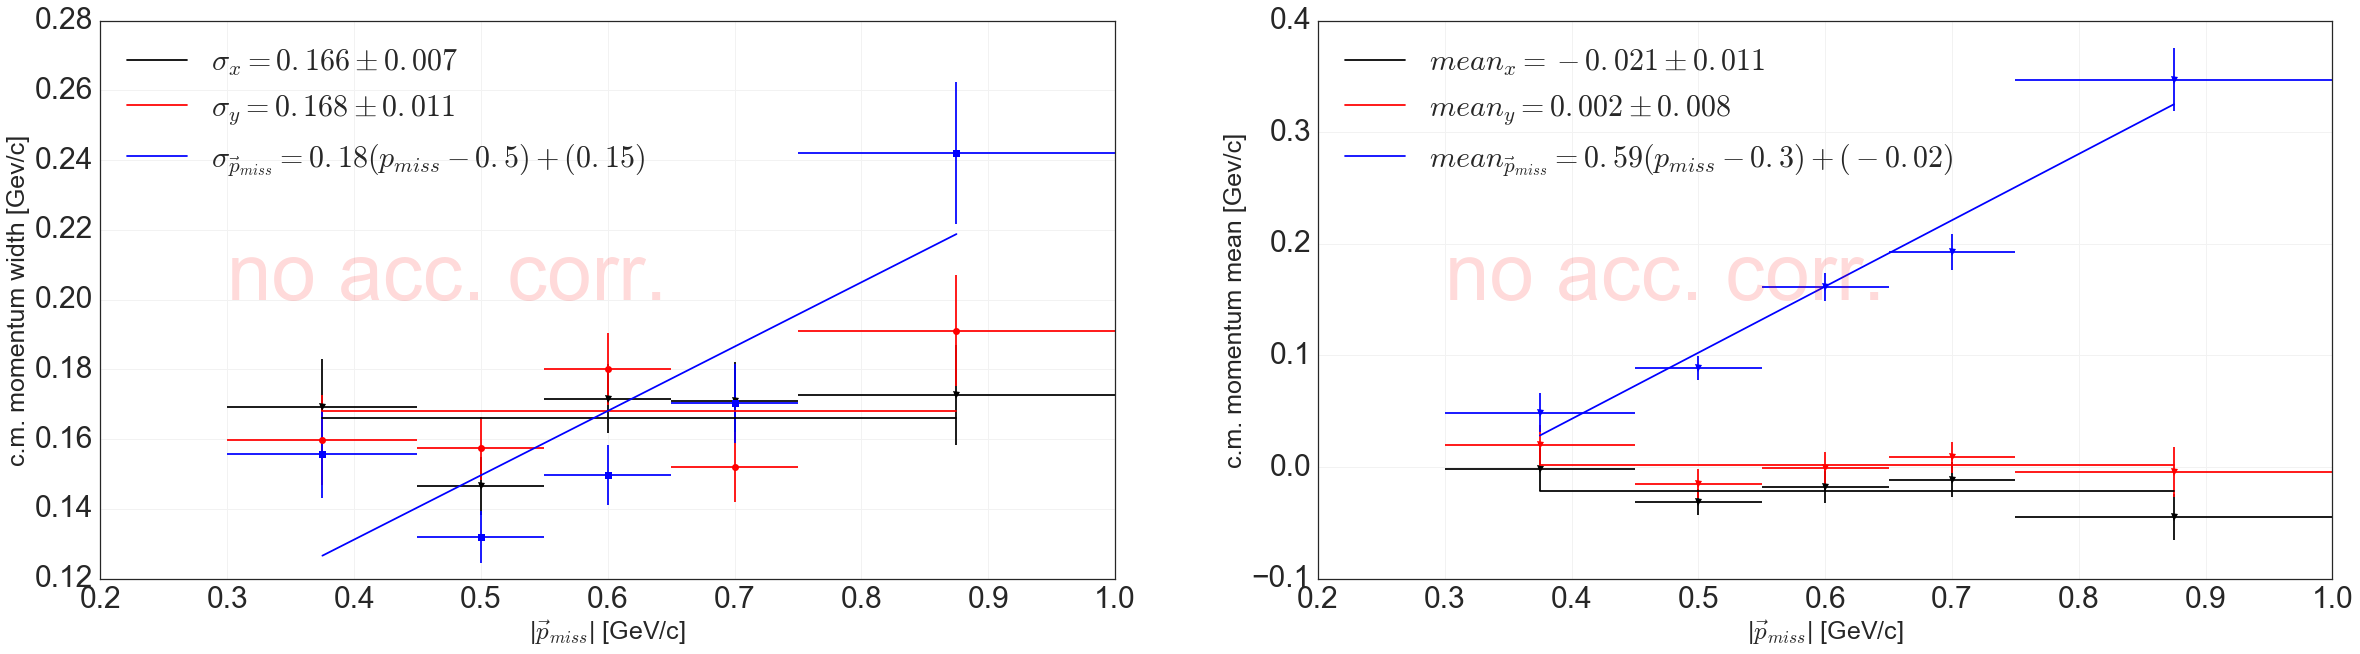

In [282]:
fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)
ax.text( 0.3 , 0.2 , "no acc. corr." , fontsize=80 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.95')
[sXfit,sXfiterr] = plot_errorbar_and_fit( ax , Pmiss, data.sigma_x , 
                                         [pMissLowErr,pMissUpErr] , [data.sigma_xErr,data.sigma_xErr],
                                         'black'  ,'v','none',r'$\sigma_{x}$' ,'const')
[sYfit,sYfiterr] = plot_errorbar_and_fit( ax , Pmiss, data.sigma_y , 
                                         [pMissLowErr,pMissUpErr] , [data.sigma_yErr,data.sigma_yErr],
                                         'red'    ,'o','none',r'$\sigma_{y}$' ,'const')
[sZa1,sZa1err],[sZa2,sZa2err] = plot_errorbar_and_fit( ax , Pmiss, data.sigma_z , 
                                                      [pMissLowErr,pMissUpErr] , [data.sigma_zErr,data.sigma_zErr],
                                                      'blue'   ,'s','none',r'$\sigma_{\vec{p}_{miss}}$' ,'linear', 0.5)
plt.xlabel( r'$p_{miss}$ [GeV/c]',fontsize=25)
plt.ylabel( r'c.m. momentum width [Gev/c]',fontsize=25)
ax.legend(loc="upper left",scatterpoints=1)

ax = fig.add_subplot(122)
ax.text( 0.3 , 0.15 , "no acc. corr." , fontsize=80 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.95')
[mXfit,mXfiterr] = plot_errorbar_and_fit( ax , Pmiss, data.mean_x , 
                      [pMissLowErr,pMissUpErr] , [data.mean_xErr,data.mean_xErr],
                      'black' ,'v','none',r'$mean_{x}$' ,'const')
[mYfit,mYfiterr] = plot_errorbar_and_fit( ax , Pmiss, data.mean_y , 
                      [pMissLowErr,pMissUpErr] , [data.mean_yErr,data.mean_yErr],
                      'red'   ,'v','none',r'$mean_{y}$' ,'const')
[mZa1,mZa1err],[mZa2,mZa2err] = plot_errorbar_and_fit( ax , Pmiss, data.mean_z , 
                      [pMissLowErr,pMissUpErr] , [data.mean_zErr,data.mean_zErr],
                      'blue'  ,'v','none',r'$mean_{\vec{p}_{miss}}$' ,'linear', 0.3)

plt.xlabel( r'$p_{miss}$ [GeV/c]',fontsize=25)
plt.ylabel( r'c.m. momentum mean [Gev/c]',fontsize=25)
ax.legend(loc="upper left",scatterpoints=1)
plt.savefig("/Users/erezcohen/Desktop/cm_width_and_mean.pdf")

outfile = open(CMFitsFname, "wb")
outfile.write("sXfit,sXfiterr,sYfit,sYfiterr,sZa1,sZa1err,sZa2,sZa2err\
,mXfit,mXfiterr,mYfit,mYfiterr,mZa1,mZa1err,mZa2,mZa2err\n")
outfile_str = "%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f"%(sXfit,sXfiterr,sYfit,sYfiterr,
                                                                 sZa1,sZa1err,sZa2,sZa2err,
                                                                 mXfit,mXfiterr,mYfit,mYfiterr,
                                                                 mZa1,mZa1err,mZa2,mZa2err)
outfile.write(outfile_str)
outfile.close()
print "wrote fit parameters to\n"+CMFitsFname

In [8]:
# create bands for event generation
run  = 0 # starting run number
debug= 1 
path = "/Users/erezcohen/Desktop/DataMining/GSIM"
RunsInfoFileName = path+"/eg_txtfiles/Info_runs_%d.csv"%run
RunsInfoFile = open(RunsInfoFileName,'wb')
RunsInfoFile.write( "run,time,SigmaT,SigmaL_a1,SigmaL_a2,ShiftL_a1,ShiftL_a2\n" )

In [9]:
cm_fits_parameters = pd.read_csv(CMFitsFname)
print "cm fits parameters: ",cm_fits_parameters
sXfit=cm_fits_parameters.sXfit
sXfiterr=cm_fits_parameters.sXfiterr
sYfit=cm_fits_parameters.sYfit
sYfiterr=cm_fits_parameters.sYfiterr
sZa1=cm_fits_parameters.sZa1
sZa1err=cm_fits_parameters.sZa1err
sZa2=cm_fits_parameters.sZa2
sZa2err=cm_fits_parameters.sZa2err
mXfit=cm_fits_parameters.mXfit
mXfiterr=cm_fits_parameters.mXfiterr
mYfit=cm_fits_parameters.mYfit
mYfiterr=cm_fits_parameters.mYfiterr
mZa1=cm_fits_parameters.mZa1
mZa1err=cm_fits_parameters.mZa1err
mZa2=cm_fits_parameters.mZa2
mZa2err=cm_fits_parameters.mZa2err
sTfit,sTfiterr = 0.5*(sXfit+sYfit) , math.sqrt(sXfit*sXfit+sYfit*sYfit)

cm fits parameters:        sXfit  sXfiterr     sYfit  sYfiterr      sZa1  sZa1err      sZa2  \
0  0.166198  0.006995  0.168058  0.010565  0.184447  0.12548  0.149648   

    sZa2err     mXfit  mXfiterr     mYfit  mYfiterr      mZa1   mZa1err  \
0  0.119124 -0.021404  0.010579  0.001548   0.00823  0.593666  0.114491   

       mZa2   mZa2err  
0 -0.016262  0.095875  


wrote fit parameters to
/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/CMparameter_Bands.csv


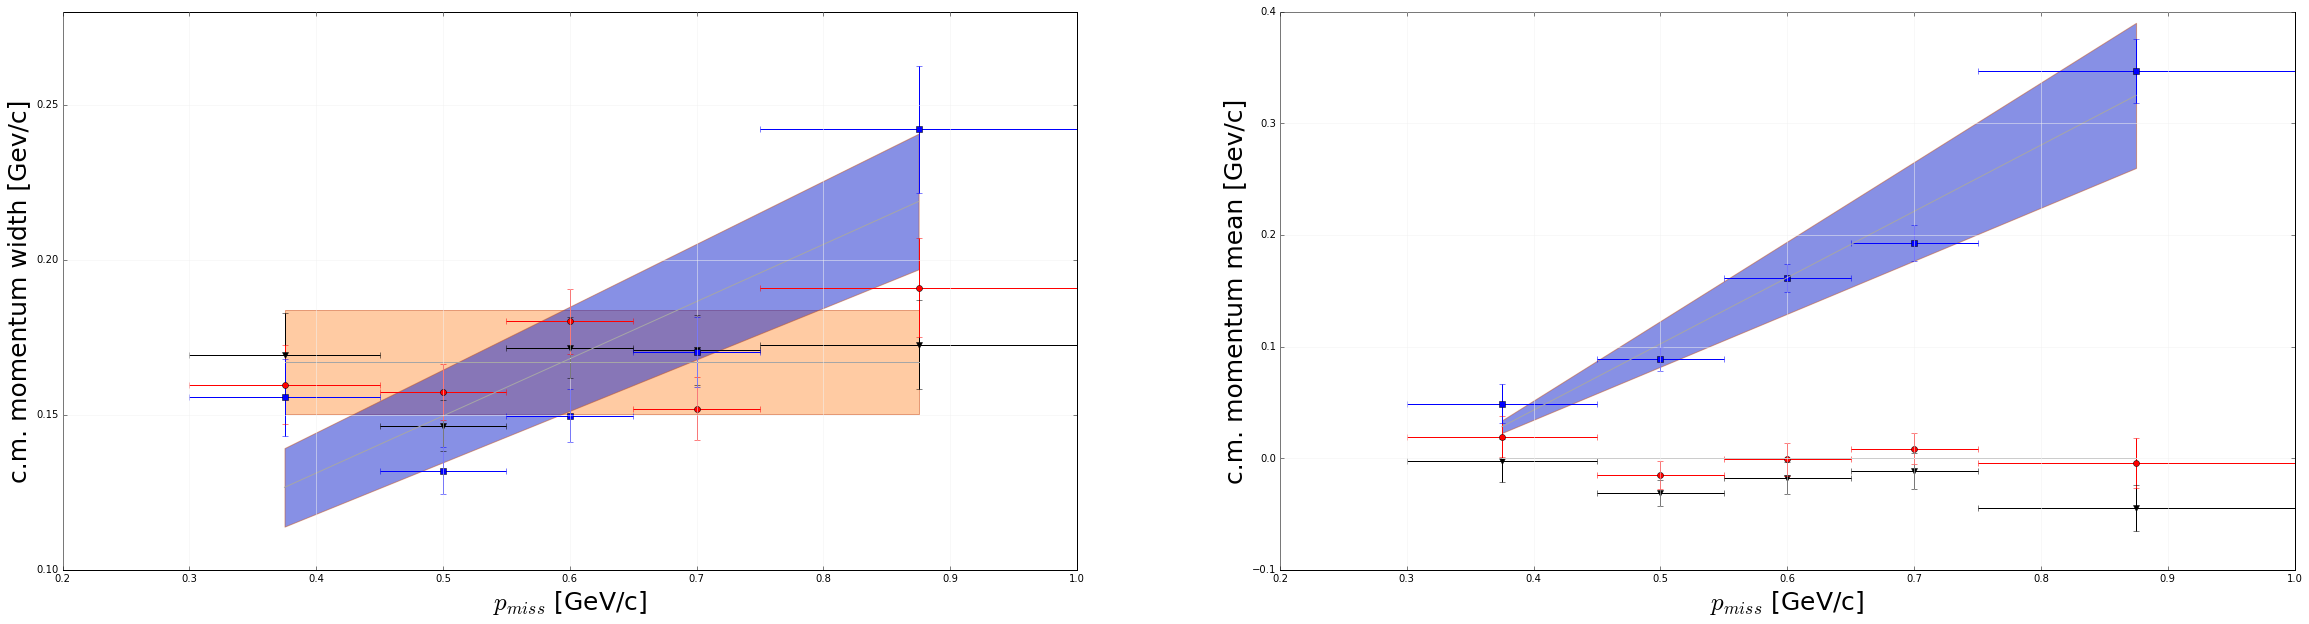

In [11]:
sTBand = np.ones(len(Pmiss))*[sTfit*0.9,sTfit*1.1]
sZa1BandMin,sZa1BandMax = sZa1*0.9,sZa1*1.1
sZa2BandMin,sZa2BandMax = sZa2*0.9,sZa2*1.1
sZBandMax = float(sZa1BandMax)*(Pmiss-0.5)+float(sZa2BandMax)
sZBandMin = float(sZa1BandMin)*(Pmiss-0.5)+float(sZa2BandMin)

fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)
ax.grid(True,linestyle='-',color='0.95')
plt.errorbar(Pmiss, data.sigma_x, xerr=[pMissLowErr,pMissUpErr], yerr=[data.sigma_xErr,data.sigma_xErr]
             , color='black', marker='v' , linestyle='none' , label=None)
plt.errorbar(Pmiss, data.sigma_y, xerr=[pMissLowErr,pMissUpErr], yerr=[data.sigma_yErr,data.sigma_yErr]
             , color='red', marker='o' , linestyle='none' , label=None)
ax.plot(Pmiss, float(sTfit)*np.ones(len(Pmiss)) , color='0.65' )

plt.fill_between(Pmiss, sTBand[0] , sTBand[1] ,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')


plt.errorbar(Pmiss, data.sigma_z, xerr=[pMissLowErr,pMissUpErr], yerr=[data.sigma_zErr,data.sigma_zErr]
             , color='blue', marker='s' , linestyle='none' , label=None)
ax.plot(Pmiss, float(sZa1)*(Pmiss-0.5) + float(sZa2), color='0.65' )
plt.fill_between(Pmiss, sZBandMin , sZBandMax ,alpha=0.5, edgecolor='#C14F1B', facecolor='#1122CC')
plt.xlabel( r'$p_{miss}$ [GeV/c]' ,fontsize=25)
plt.ylabel( r'c.m. momentum width [Gev/c]',fontsize=25)


mTBand = np.zeros(len(Pmiss))
mZa1BandMin , mZa1BandMax = mZa1*0.8,mZa1*1.2
mZa2BandMin , mZa2BandMax = mZa2*0.8,mZa2*1.2
mZBandMax = float(mZa1BandMax)*(Pmiss-0.3)+float(mZa2BandMax)
mZBandMin = float(mZa1BandMin)*(Pmiss-0.3)+float(mZa2BandMin)

ax = fig.add_subplot(122)
ax.grid(True,linestyle='-',color='0.95')
plt.errorbar(Pmiss, data.mean_x, xerr=[pMissLowErr,pMissUpErr], yerr=[data.mean_xErr,data.mean_xErr]
             , color='black', marker='v' , linestyle='none' , label=None)
plt.errorbar(Pmiss, data.mean_y, xerr=[pMissLowErr,pMissUpErr], yerr=[data.mean_yErr,data.mean_yErr]
             , color='red', marker='o' , linestyle='none' , label=None)
ax.plot(Pmiss, np.zeros(len(Pmiss)) , color='0.65' )

plt.errorbar(Pmiss, data.mean_z, xerr=[pMissLowErr,pMissUpErr], yerr=[data.mean_zErr,data.mean_zErr]
             , color='blue', marker='s' , linestyle='none' , label=None)
ax.plot(Pmiss, float(mZa1)*(Pmiss-0.3) + float(mZa2), color='0.65' )
plt.fill_between(Pmiss, mZBandMin , mZBandMax ,alpha=0.5, edgecolor='#C14F1B', facecolor='#1122CC')

plt.xlabel( r'$p_{miss}$ [GeV/c]' ,fontsize=25)
plt.ylabel( r'c.m. momentum mean [Gev/c]',fontsize=25)

plt.savefig("/Users/erezcohen/Desktop/cm_width_and_mean_Bands.pdf")

outfile = open(CMBandFname, "wb")
outfile.write("sTBandMin,sTBandMax,sZa1Min,sZa1Max,sZa2Min,sZa2Max,mZa1Min,mZa1Max,mZa2Min,mZa2Max\n")
outfile_str = "%f,%f,%f,%f,%f,%f,%f,%f,%f,%f\n"%(np.amin(sTBand),np.amax(sTBand),
                         sZa1BandMin,sZa1BandMax,sZa2BandMin,sZa2BandMax,
                         mZa1BandMin,mZa1BandMax,mZa2BandMin,mZa2BandMax)
outfile.write(outfile_str)
outfile.close()
print "wrote fit parameters to\n"+CMBandFname

In [12]:
cm_fits_bands = pd.read_csv(CMBandFname)
sTBandMin = float(cm_fits_bands.sTBandMin)
sTBandMax = float(cm_fits_bands.sTBandMax)
sZa1Min = float(cm_fits_bands.sZa1Min)
sZa1Max = float(cm_fits_bands.sZa1Max)
sZa2Min = float(cm_fits_bands.sZa2Min)
sZa2Max = float(cm_fits_bands.sZa2Max)
mZa1Min = float(cm_fits_bands.mZa1Min)
mZa1Max = float(cm_fits_bands.mZa1Max)
mZa2Min = float(cm_fits_bands.mZa2Min)
mZa2Max = float(cm_fits_bands.mZa2Max)

Npts = 2
sigT   = np.linspace(sTBandMin ,sTBandMax  ,Npts)
sigLa1 = np.linspace(sZa1Min   ,sZa1Max    ,Npts)
sigLa2 = np.linspace(sZa2Min   ,sZa2Max    ,Npts)
meanLa1 = np.linspace(mZa1Min  ,mZa1Max    ,Npts)
meanLa2 = np.linspace(mZa2Min  ,mZa2Max    ,Npts)

In [272]:
# df = pd.DataFrame({'sigT':sigT,'sigLa1':sigLa1,'sigLa2':sigLa2,'shfLa1':shfLa1,'shfLa2':shfLa2})
# df

In [13]:
RunsInfoFile = open(RunsInfoFileName,'wb')
RunsInfoFile.write( "run,time,SigmaT,SigmaL_a1,SigmaL_a2,ShiftL_a1,ShiftL_a2\n" )
for sT in sigT:
    for sLa1 in sigLa1:
        for sLa2 in sigLa1:
            for mLa1 in meanLa1:
                for mLa2 in meanLa2:
                    run = run+1
                    par_str = "%d"%run+","+str(datetime.datetime.now().strftime("%Y%B%d"))
                    par_str += ",%f"%sT+",%f"%sLa1+",%f"%sLa2+",%f"%mLa1+",%f"%mLa2+"\n"
                    RunsInfoFile.write( par_str )
                    gen_events = GenerateEvents( path , run , debug )
                    gen_events.SetNRand( 1 )
                    gen_events.Set_eep_Parameters( sT , sLa1 , sLa2 , mLa1 , mLa2 )
                    gen_events.DoGenerate( "(e,e'pp)" , True , False )
RunsInfoFile.close()
print "done... see \n",RunsInfoFileName

done... see 
/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/Info_runs_0.csv


In [15]:
data=pd.read_csv(RunsInfoFileName)

In [32]:
runs = data.run
runs;

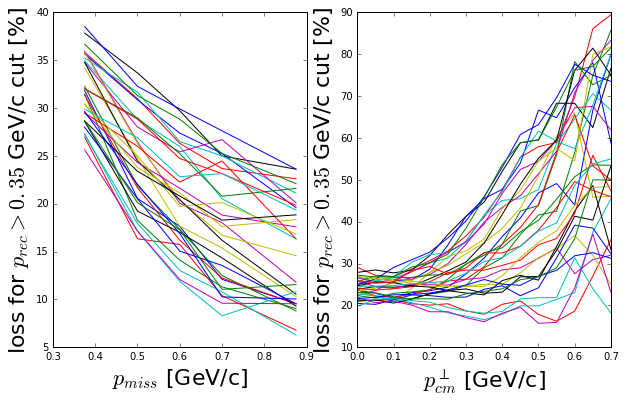

In [37]:
# plot the loss band due to p(rec.) cut
PrecMin  = 0.35
CutPrec  = ROOT.TCut("%f<Precoil.Mag()"%PrecMin)

PcmTMin = np.linspace(0.0,0.7,15)
PcmTMax = np.linspace(0.1,0.8,15)
PcmTBins = [ PcmTMin , PcmTMax]
figure= plt.figure(figsize=(10,6))


ax = plt.subplot(1,2,1)

for run in runs:
    
    ana = TPlots("/Users/erezcohen/Desktop/DataMining/GSIM/eg_rootfiles/run%d.root"%run,"anaTree")
    fracGoodPrec = []
    
    for i in range(len(Pmiss)):
        CutPmBin = ROOT.TCut("%f<Pmiss.Mag() && Pmiss.Mag()<%f"%(PmissBins[i][0],PmissBins[i][1]))
        NentriesPmissBin = ana.GetEntries( CutPmBin )
        NentriesPrecCut = ana.GetEntries( CutPmBin + CutPrec )
        if (NentriesPmissBin > 0):
            fracGoodPrec.append(100*(1-float(NentriesPrecCut)/NentriesPmissBin))
        else:
            fracGoodPrec.append(100)


    l, = plt.plot( Pmiss , fracGoodPrec , label='run %d'%run )
#     index = 1
#     pos = [(Pmiss[index-1]+Pmiss[index])/2., (fracGoodPrec[index-1]+fracGoodPrec[index])/2.]
#     xscreen = ax.transData.transform(zip(Pmiss[-2::],fracGoodPrec[-2::]))
    rot = np.rad2deg(np.arctan2(*np.abs(np.gradient(xscreen)[0][0][::1])))
#     ltex = plt.text(pos[0], pos[1], '%d'%run , size=9, rotation=rot, color = l.get_color(),
#                     ha="center", va="center",bbox = dict(ec='1',fc='1'))
    ana.Close()


    
plt.xlabel(r'$p_{miss}$ [GeV/c]',fontsize=22)
plt.ylabel('loss for $p_{rec}>0.35$ GeV/c cut [%]',fontsize=22)


plt.subplot(1,2,2)

for run in runs:
    
    ana = TPlots("/Users/erezcohen/Desktop/DataMining/GSIM/eg_rootfiles/run%d.root"%run,"anaTree")

    fracGoodPrecPcmT = []

    for i in range(len(PcmTMax)):
        CutPcmTBin = ROOT.TCut("%f<Pcm.Pt() && Pcm.Pt()<%f"%(PcmTMin[i],PcmTMax[i]))
        NentriesPcmTBin = ana.GetEntries( CutPcmTBin )
        NentriesPrecCut = ana.GetEntries( CutPcmTBin + CutPrec )
        if (NentriesPcmTBin > 0):
            fracGoodPrecPcmT.append(100*(1-float(NentriesPrecCut)/NentriesPcmTBin))
        else:
            fracGoodPrecPcmT.append(100)

    lPcmT, = plt.plot( PcmTMin , fracGoodPrecPcmT )
    
    ana.Close()

plt.xlabel(r'$p_{cm}^{\perp}$ [GeV/c]',fontsize=22)
plt.ylabel('loss for $p_{rec}>0.35$ GeV/c cut [%]',fontsize=22)